In [11]:
from astropy import stats
import numpy as np
data = np.array([1,2,3,4,5,6,7,8,9,0])
clipped_data = stats.sigma_clip(data, sigma = 2, maxiters=5)
print(clipped_data)
print(data.mean())
print(clipped_data.mean())

[1 2 3 4 5 6 7 8 9 0]
4.5
4.5


In [12]:
from astropy.stats import jackknife_stats
data = np.array([1,2,3,4,5,6,7,8,9,0])
test_stats = np.mean
estimate ,bias, stderr, conf_interval = jackknife_stats(data, test_stats, 0.65)

print(estimate)
print(bias)
print(stderr)
print(conf_interval)


4.5
0.0
0.9574271077563383
[3.60519888 5.39480112]


In [13]:
from astropy import cosmology

In [14]:
print(cosmology.parameters.available)

['Planck18', 'Planck18_arXiv_v2', 'Planck15', 'Planck13', 'WMAP9', 'WMAP7', 'WMAP5']


In [15]:
from astropy.cosmology import WMAP9

In [16]:
WMAP9.Ode(3)

0.037406958346647055

In [17]:
WMAP9.critical_density(3)

<Quantity 1.72139427e-28 g / cm3>

In [18]:
WMAP9.Tcmb(1100)

<Quantity 3000.225 K>

In [19]:
WMAP9.angular_diameter_distance(2)

<Quantity 1763.91012479 Mpc>

In [20]:
WMAP9.arcsec_per_kpc_comoving(3)

<Quantity 0.03171401 arcsec / kpc>

In [21]:
WMAP9.scale_factor(3)

0.25

In [22]:
WMAP9.age(1100)


<Quantity 0.00037004 Gyr>

In [23]:
print(dir(WMAP9))

['H', 'H0', 'Neff', 'Ob', 'Ob0', 'Ode', 'Ode0', 'Odm', 'Odm0', 'Ogamma', 'Ogamma0', 'Ok', 'Ok0', 'Om', 'Om0', 'Onu', 'Onu0', 'Tcmb', 'Tcmb0', 'Tnu', 'Tnu0', '_EdS_age', '_EdS_comoving_distance_z1z2', '_EdS_lookback_time', '_H0', '_Neff', '_Ob0', '_Ode0', '_Odm0', '_Ogamma0', '_Ok0', '_Om0', '_Onu0', '_T_hypergeometric', '_Tcmb0', '_Tnu0', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abs_distance_integrand_scalar', '_age', '_comoving_distance_z1z2', '_comoving_transverse_distance_z1z2', '_critical_density0', '_dS_age', '_dS_comoving_distance_z1z2', '_dS_lookback_time', '_elliptic_comoving_distance_z1z2', '_flat_age', '_flat_lookback_time', '_h', '_hubble_d

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models

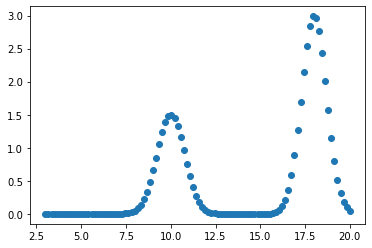

In [25]:
x = np.linspace(3,20,100)
a = models.Gaussian1D(amplitude= 1.5 ,mean = 10,stddev= 0.77 )
b = models.Gaussian1D(amplitude= 3.0 ,mean = 18,stddev= 0.7 )
c = a + b
y = c(x)

plt.scatter(x,y)

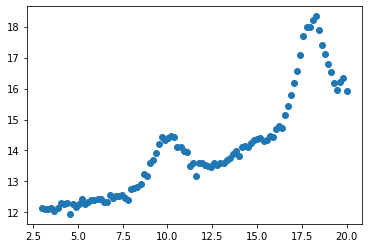

In [26]:
# Let's Add some Noice to It with the random Function

import numpy.random as nr

y_noise= nr.normal(0,0.1,len(x))
y_obs= 12+ 0.01*x**2 +y +y_noise
plt.scatter(x,y_obs)

In [27]:
model = models.Gaussian1D(amplitude=1.7,mean = 10, stddev=0.7) +\
        models.Gaussian1D(amplitude=3.0,mean = 18, stddev=0.777) +\
        models.Polynomial1D(degree=2)
        
print(model.param_names)

('amplitude_0', 'mean_0', 'stddev_0', 'amplitude_1', 'mean_1', 'stddev_1', 'c0_2', 'c1_2', 'c2_2')


In [28]:
#Appling some constrains.
def constrain_mean(model):
    mean_0 = model.mean_1 - 1.5
    return mean_0
model.mean_0.tied = constrain_mean

In [29]:
from astropy.modeling import fitting
fitter = fitting.LevMarLSQFitter()

model_fit = fitter(model,x,y_obs)
print(model_fit.param_names)
print(model_fit.parameters)

('amplitude_0', 'mean_0', 'stddev_0', 'amplitude_1', 'mean_1', 'stddev_1', 'c0_2', 'c1_2', 'c2_2')
[-1.05738774e+00  1.64689280e+01  3.15005152e+00  3.09941558e+00
  1.79689280e+01  7.30827407e-01  1.11001384e+01  2.31705414e-01
  2.37676837e-03]


In [30]:
dict(zip(model_fit.param_names,model_fit.parameters))

{'amplitude_0': -1.0573877414460355,
 'mean_0': 16.468927966853254,
 'stddev_0': 3.150051519297147,
 'amplitude_1': 3.0994155773002623,
 'mean_1': 17.968927966853254,
 'stddev_1': 0.7308274067395417,
 'c0_2': 11.100138430436592,
 'c1_2': 0.23170541409100265,
 'c2_2': 0.0023767683674754242}

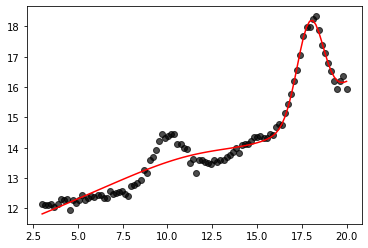

In [31]:
plt.scatter(x,y_obs,color='black',alpha=0.7)
plt.plot(x,model_fit(x), color='red')

In [32]:
import astroquery
print(astroquery.version.version)

0.4.5


In [33]:
from astroquery.simbad import Simbad
from astropy import coordinates
import astropy.units as u
#Work only for ICRS coordinates:
c = coordinates.SkyCoord("05h35m17.3s -05d23m28s", frame='icrs')
r = 1* u.arcminute
result_table = Simbad.query_region(c,radius = r)
result_table.pprint(show_unit=True,max_width=100 ,max_lines=100)

            MAIN_ID                   RA           DEC      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
                                   "h:m:s"       "d:m:s"    ...                                     
------------------------------- ------------- ------------- ... ------------------- ----------------
                          M  42    05 35 17.3     -05 23 28 ... 1981MNRAS.194..693L                1
                NAME Ori Region   05 35 17.30   -05 23 28.0 ...                                    1
                  [FRM2016] 344 05 35 17.2210 -05 23 26.542 ... 2016ApJ...822...93F                1
                 DOH  7 175-328    05 35 17.5     -05 23 28 ... 2004AJ....127.3456D                1
                        MAX 126   05 35 17.11   -05 23 29.3 ... 2005AJ....129.1534R                1
                 DOH  7 171-327    05 35 17.1     -05 23 27 ... 2004AJ....127.3456D                1
                        MAX 125   05 35 17.11   -05 23 26.6 ... 2005AJ....129.1534R        

In [34]:
import astropy
from astropy import units as u
from astroquery.xmatch import XMatch
table = XMatch.query(cat1=open('VS_Python2022/pos_list.csv'),
                     cat2='vizier:II/246/out',
                     max_distance=5* u.arcsec, colRA1='ra',
                     colDec1='dec')
print(type(table))
print(table.colnames)

<class 'astropy.table.table.Table'>
['angDist', 'ra', 'dec', '2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [35]:
print(table)

angDist      ra       dec         2MASS       ... Qfl Rfl  X   MeasureJD  
-------- --------- --------- ---------------- ... --- --- --- ------------
1.352044 267.22029 -20.35869 17485281-2021323 ... EEU 226   2 2450950.8609
1.578188 267.22029 -20.35869 17485288-2021328 ... UUB 662   2 2450950.8609
3.699368 267.22029 -20.35869 17485264-2021294 ... UUB 662   2 2450950.8609
3.822922 267.22029 -20.35869 17485299-2021279 ... EBA 222   2 2450950.8609
4.576677 267.22029 -20.35869 17485255-2021326 ... CEU 226   2 2450950.8609
0.219609 274.83971 -25.42714 18192154-2525377 ... AAA 211   0 2451407.5033
1.633225 275.92229 -30.36572 18234133-3021582 ... EEE 222   2 2451021.7212
0.536998 283.26621  -8.70756 18530390-0842276 ... AAA 222   0 2451301.7945
1.178542 306.01575  33.86756 20240382+3352021 ... AAA 222   0 2450948.9708
0.853178   322.493  12.16703 21295836+1210007 ... EEA 222   0 2451080.6935
 4.50395   322.493  12.16703 21295861+1210023 ... EEE 222   0 2451080.6935


In [36]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
pos = coords.SkyCoord('0h8m05.65s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos,spectro=True)
print(xid)

       ra              dec        ...     specobjid      run2d
---------------- ---------------- ... ------------------ -----
2.02344596573482 14.8398237551311 ... 845594848269461504    26


In [37]:
sp =SDSS.get_spectra(matches=xid)
print(sp)
spec =sp[0][1].data

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fcac0b89eb0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcaf0cb9bb0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcac0b894c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcaf0d4cd90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcaf0d6fa00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcab0512670>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcac0ba12e0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcac0baef10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcaa0055700>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fcaa005f370>]]


(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')])


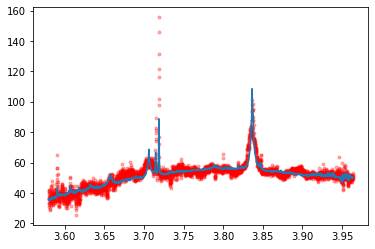

In [38]:
import matplotlib.pyplot as plt
print(spec.dtype)
flux = spec['flux']
loglam = spec['loglam']
model=spec['model']
plt.scatter(loglam,flux,marker='.',alpha=0.3,color='red')
plt.plot(loglam,model)
